# Gasoline Price Visualization & Analysis

Last modified on *2023-12-18*

### Data Info
- Source of data: 
1. Opinet(한국석유공사) https://www.opinet.co.kr/user/main/mainView.do, 
2. Petronet(한국석유공사) https://www.petronet.co.kr/v3/index.js
- Period of data: 2008-04-15 to 2023-11-30

### Version Info
1. Pyhton - 3.8.18
2. pandas - 1.5.3
3. numpy - 1.23.5
4. matplotlib - 3.7.2
5. plotly - 5.18.0
6. seaborn - 0.12.2

## 1. Import Data

In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt   # data visualization
import seaborn as sns             # statistical data visualization
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
files = ['gasoline.csv', 'oil.csv', 'gasoline_whole.csv', 'tax.csv', 'supply_demand_refined.csv', 'consumption_inventory.csv']

gasoline = pd.read_csv(files[0])
oil = pd.read_csv(files[1])
whole = pd.read_csv(files[2])
tax = pd.read_csv(files[3])
SD = pd.read_csv(files[4])
CI = pd.read_csv(files[5])

## Visualization

### 1. Retail Gasoline Price

In [3]:
pd.options.plotting.backend = "plotly"
fig_gasoline = gasoline.plot(x='Date', y=['Gasoline']).update_layout(
    title = 'Retail Gasoline Price', xaxis_title="Date", yaxis_title="Gasoline Price(KRW/L)",
    template = 'plotly_dark')

fig_gasoline.data[0].line.color = "#00ff00"
fig_gasoline.show()

### 2. Oil Price

In [4]:
pd.options.plotting.backend = "plotly"
fig_oil = oil.plot(x='Date', y=['WTI', 'Dubai', 'Brent']).update_layout(
    title = 'Oil Price', xaxis_title="Date", yaxis_title="Oil Price(KRW/L)",
    template = 'plotly_dark')
    
fig_oil.show()

### 3. Retail Gasoline Price & Oil Price

In [5]:
fig_combined = go.Figure(data = fig_gasoline.data + fig_oil.data).update_layout(
    title = 'Retail Gasoline Price & Oil Price', xaxis_title="Date", yaxis_title="Price(KRW/L)",
    template = 'plotly_dark')
fig_combined.show()

### 4. Tax

In [6]:
pd.options.plotting.backend = "plotly"
fig_tax = tax.plot(x='Date', y=['교통에너지환경세', '교육세', '주행세']
               , template = 'plotly_dark').update_layout(
    title = 'Taxation Transition', xaxis_title="Date", yaxis_title="Tax(KRW)")
fig_tax.show()

### 5. Gasoline Distribution Price

In [7]:
pd.options.plotting.backend = "plotly"
fig_whole = whole.plot(x='Date', y=['세전가', '정유사', '대리점', '주유소']).update_layout(
    title = 'Gasoline Distribution Price', xaxis_title="Date", yaxis_title="Gasoline Price (KRW/L)",
    template = 'plotly_dark')
    
fig_whole.show()

In [8]:
fig_distribution_hist = px.histogram(whole, x="Date", y=['세전가', '정유사', '대리점', '주유소'],
             title = 'Gasoline Distribution Price Rate',
             template = 'plotly_dark').update_layout(bargap=0.2, xaxis_title="Date", 
                                                     yaxis_title="Gasoline Price(Stacked)(KRW/L)")
fig_distribution_hist.show()

### 6. Gasoline Consumption & Inventory

In [9]:
pd.options.plotting.backend = "plotly"
fig_ci = CI.plot(x='Date', y=['Inventory', 'Consumption']).update_layout(
    title = 'Gasoline Consumtion & Inventory', xaxis_title="Date", yaxis_title="Amount of Gasoline(1K Bbl)",
    template = 'plotly_dark')
    
fig_ci.show()

In [10]:
fig_ci_hist = px.histogram(CI, x="Date", y=['Inventory', 'Consumption'],
             title = 'Gasoline Consumption & Inventory Rate',
             template = 'plotly_dark').update_layout(bargap=0.2, xaxis_title="Date", 
                                                     yaxis_title="Amount of Gasoline(Stacked)(1K Bbl)")
fig_ci_hist.show()

### 7. Total Supply&Demand with Import and Inventory

In [11]:
pd.options.plotting.backend = "plotly"
fig1 = SD.plot(x='Date', y=['Oil Import', 'Supply', 'Demand', 'Total Inventory']
               , template = 'plotly_dark').update_layout(
    title = 'Total Oil Supply, Demand, Import and Inventory', xaxis_title="Date", yaxis_title="Amount of Oil(1k Bbl)")
fig1.show()

In [12]:
fig_SD_hist = px.histogram(SD, x="Date", y=['Oil Import', 'Supply', 'Demand', 'Total Inventory'],
             title = 'Total Oil Supply, Demand, Import and Inventory Rate',
             template = 'plotly_dark').update_layout(bargap=0.2, xaxis_title="Date", 
                                                     yaxis_title="Amount of Oil(Stacked)(1k Bbl)")
fig_SD_hist.show()

### 8. Time Series Analysis

1. Trend factor(추세요인): 장기변동 / 기술의 변화, 인플레이션 / 전반적 움직임
2. Cycle factor(순환요인): 중기변동 / 경기순환주기 / 몇 년 단위 반복 움직임 / 파악 어려움 / 계절성 잡은 후 잡기 가능
3. Seasonal factor(계절 요인): 1년 주기로 발생하는 단기변동
4. Irregular factor(불규칙 요인): 측정 및 예측이 어려운 오차변동 / 시계열을 위 세 가지 요인으로 설명하고 남은 변동

In [13]:
gasoline['Date'] = pd.to_datetime(gasoline['Date'], errors='coerce')

gasoline['year'] = gasoline['Date'].dt.year
gasoline['month'] = gasoline['Date'].dt.month

In [14]:
gasoline['year'] = [d.year for d in gasoline.Date]
gasoline['month'] = [d.strftime('%b') for d in gasoline.Date]
years = gasoline['year'].unique()

#### Barplot for Trend & Seasonality of Gasoline Price

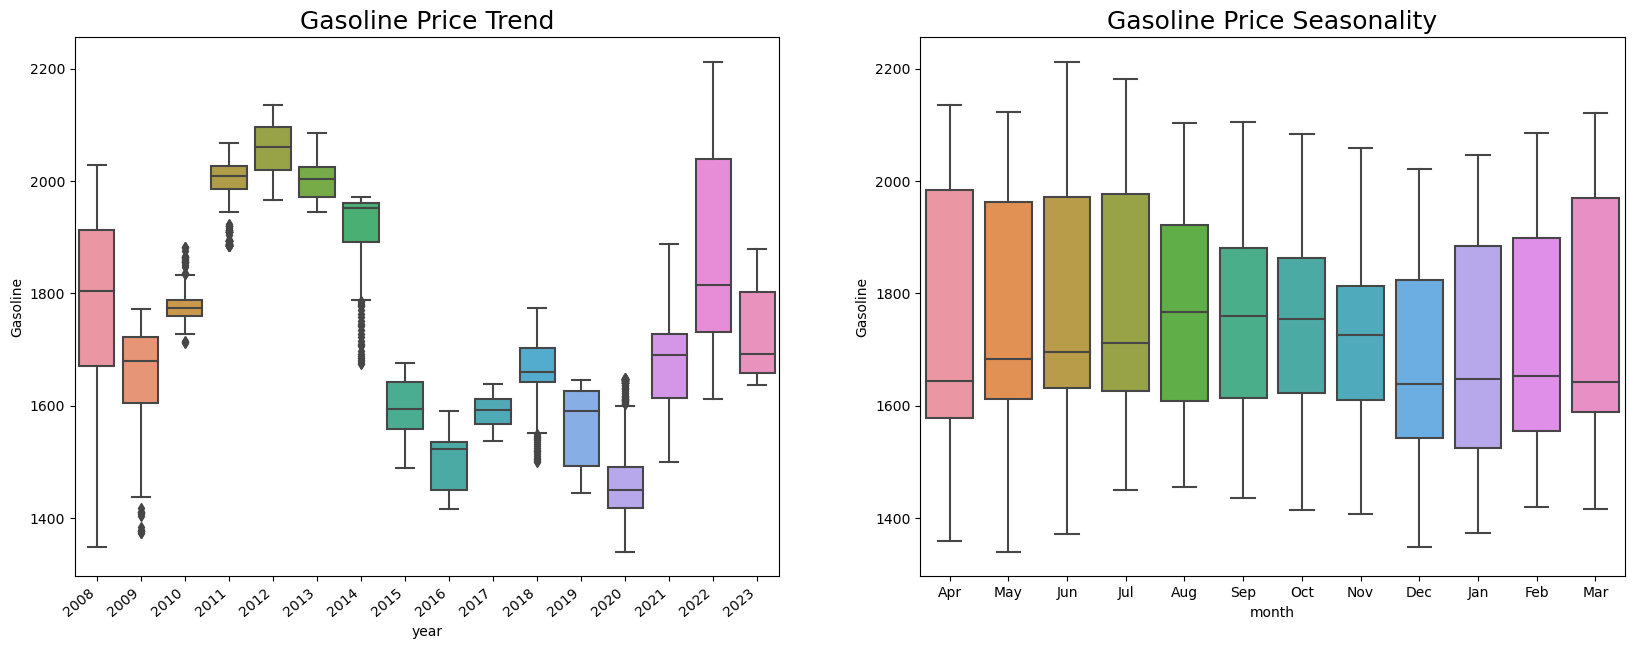

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 100)

sns.boxplot(data=gasoline, x="year", y="Gasoline", ax=axes[0])
sns.boxplot(data=gasoline, x="month", y="Gasoline", ax=axes[1])

axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=40, ha="right")
axes[0].set_title('Gasoline Price Trend', fontsize=18)
axes[1].set_title('Gasoline Price Seasonality', fontsize=18)

plt.show()

#### Multiplicative & Additive Decomposition
* 가법적 시계열 데이터 분해 = 기초레벨 + 트렌드 + 계절성 + 에러(잔차)
* 승법적 시계열 데이터 분해 = 기초레벨 * 트렌트 * 계절성 * 에러(잔차)
---
- 일반적으로 x축에 고르게 넓게 무작위로 퍼져 있으면 적합한 모델로 본다.
- Additive decomposition의 residuals(잔차)를 살펴보면 약간의 패턴이 있는 것을 알 수 있다.
- The multiplicative decomposition, looks quite random which is good. So ideally, multiplicative decomposition should be preferred for this particular series.

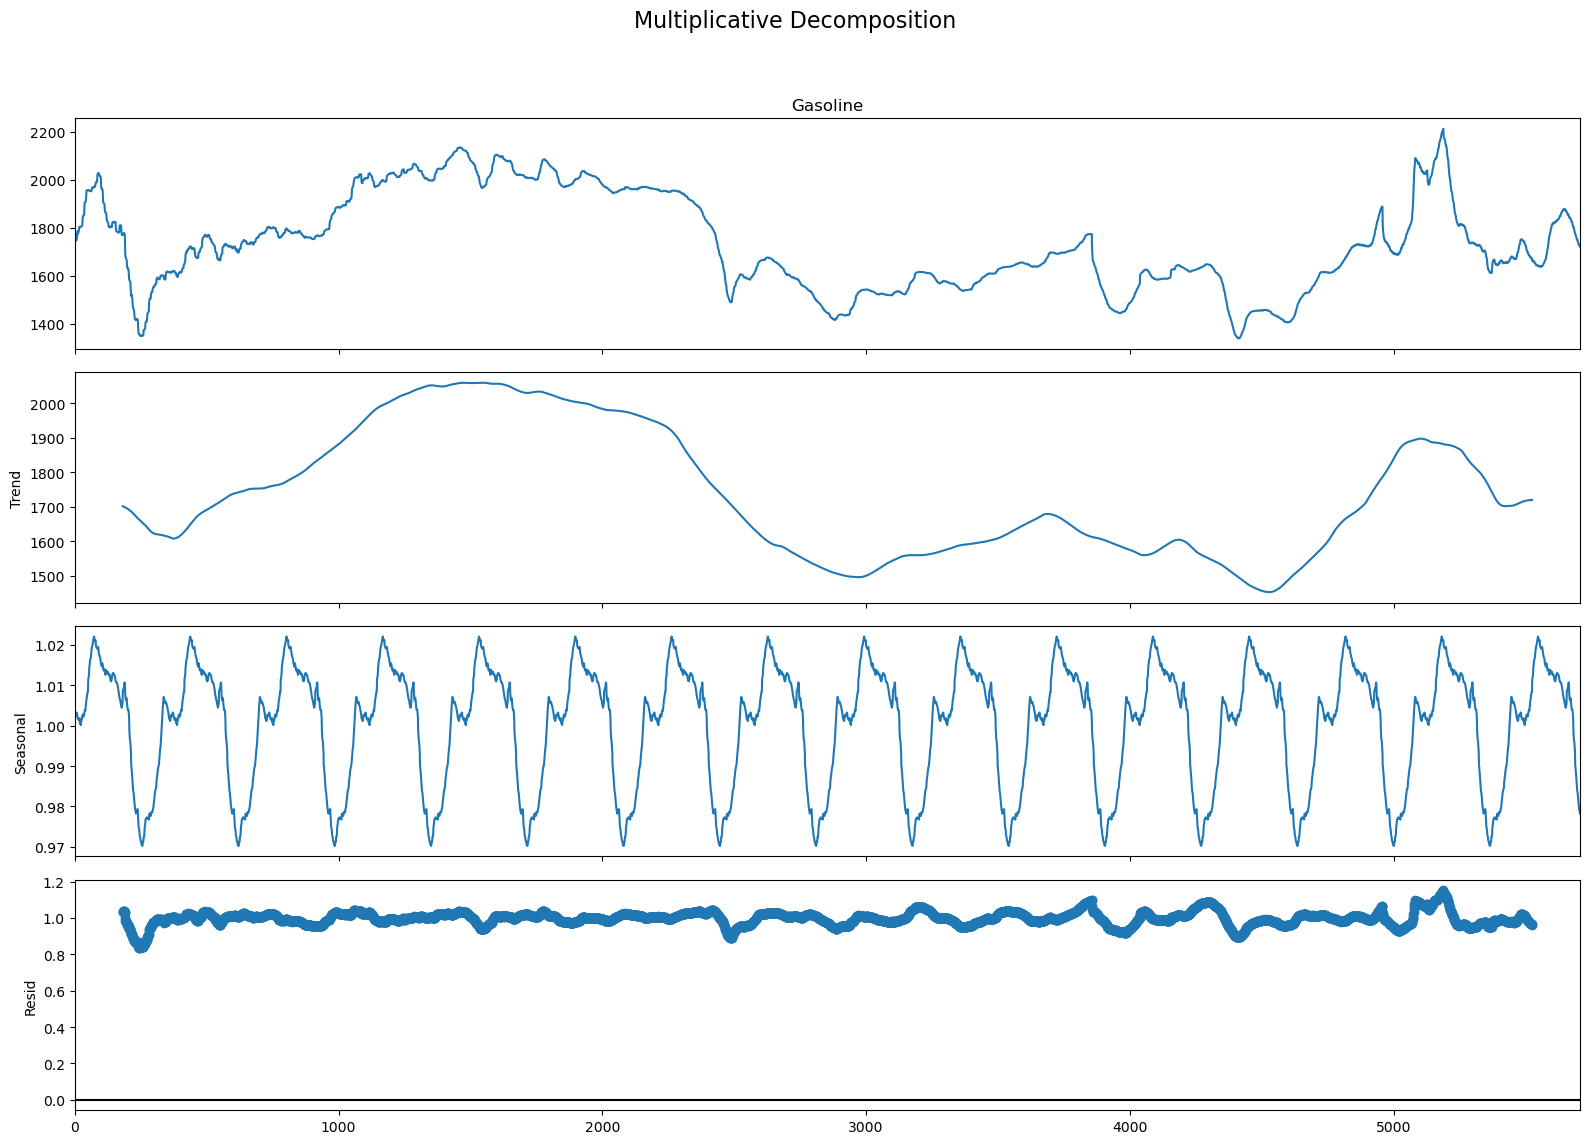

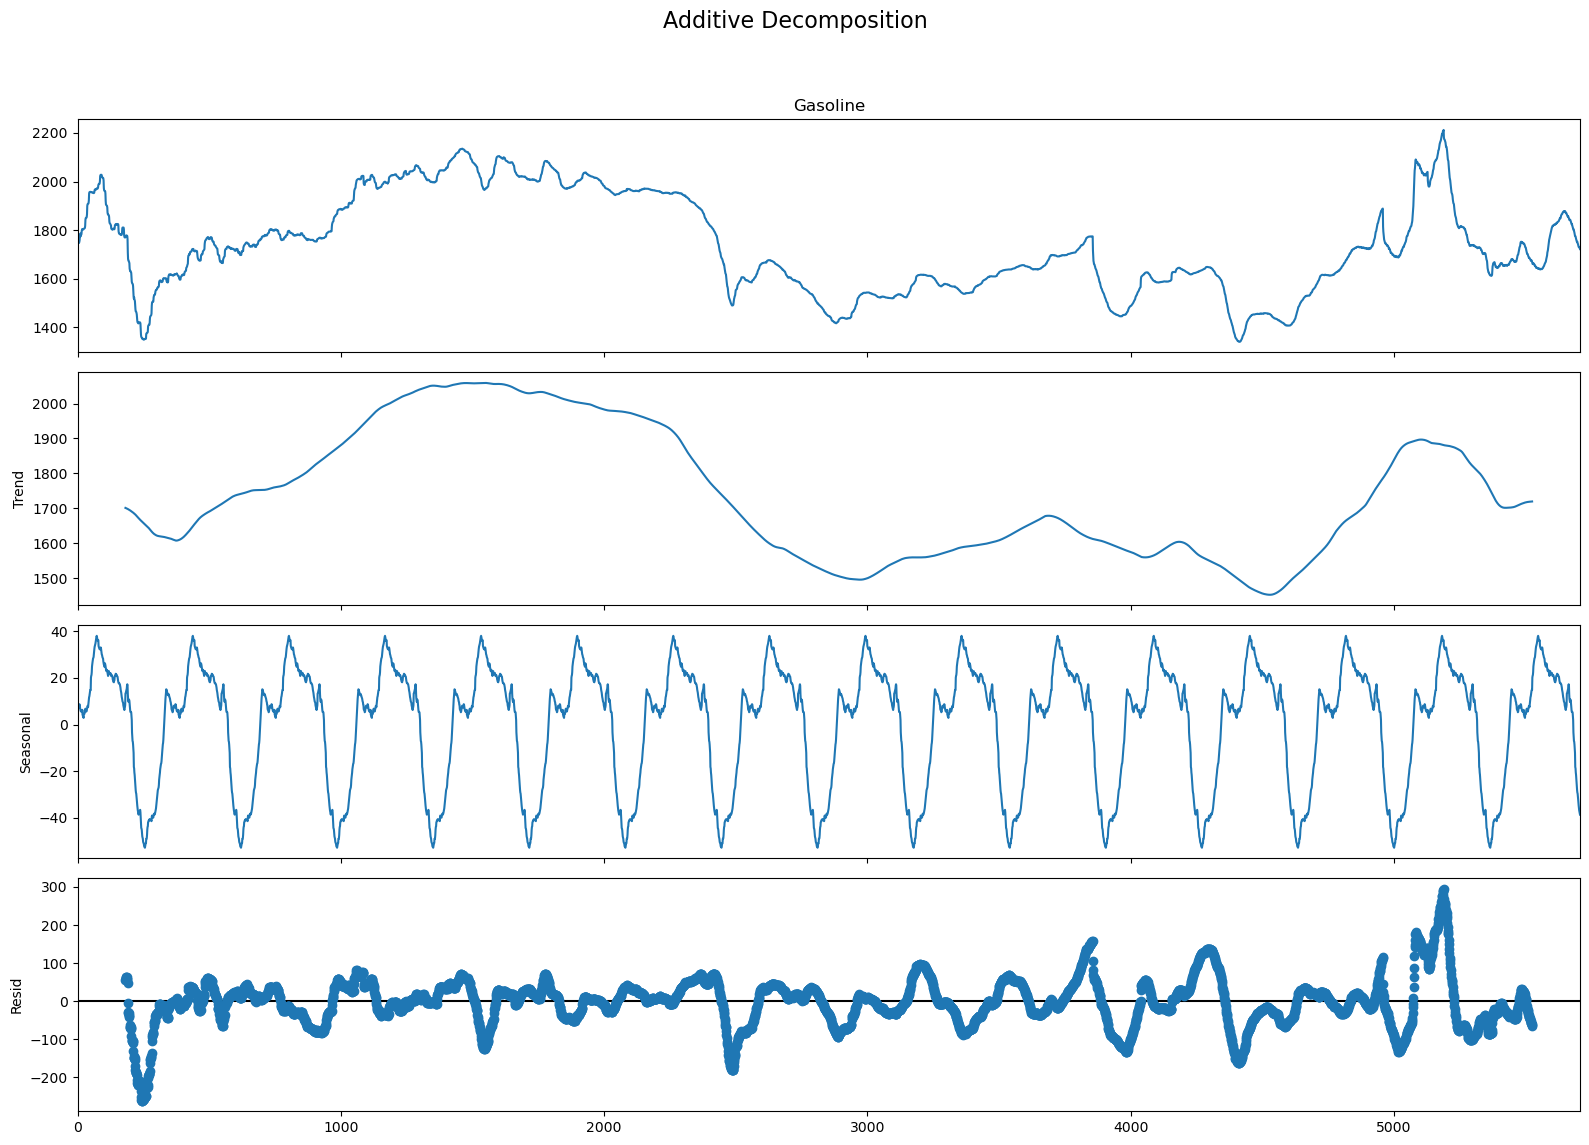

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

# Multiplicative Decomposition 
multiplicative_decomposition = seasonal_decompose(gasoline['Gasoline'], model='multiplicative', period=365)

# Additive Decomposition
additive_decomposition = seasonal_decompose(gasoline['Gasoline'], model='additive', period=365)

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

#### STL 
* 고전적 분해법에서 추세를 뽑아 낼 때 이동 평균(Multiplicative, Additive Decomposition) 방법 사용
* 이동 평균은 너무 단순하여 추세의 추정치가 깔끔하지 않다는 단점
---
* 이를 대신해 쓸 수 있는 방법 중 STL을 사용하였다.
* STL에서 LOESS라는 방법이 존재. 산점도로 표현된 데이터의 부분 부분에서 매끄러운 선을 추정했다는 뜻의 'Locally Estimated Scatterplot Smoothing'
* 이 선들을 이어붙여 전체적으로 매끄러운 곡선을 만드는 것이 LOESS 방법이다.
---
* 이 LOESS를 이용해서 계절성과 추세를 분해하는 방법이 Seasonal-Trend decomposition using LOESS, 줄여서 STL 분해이다.

본 데이터의 주기가 365일이라 판단하였으므로 period = 365로 설정

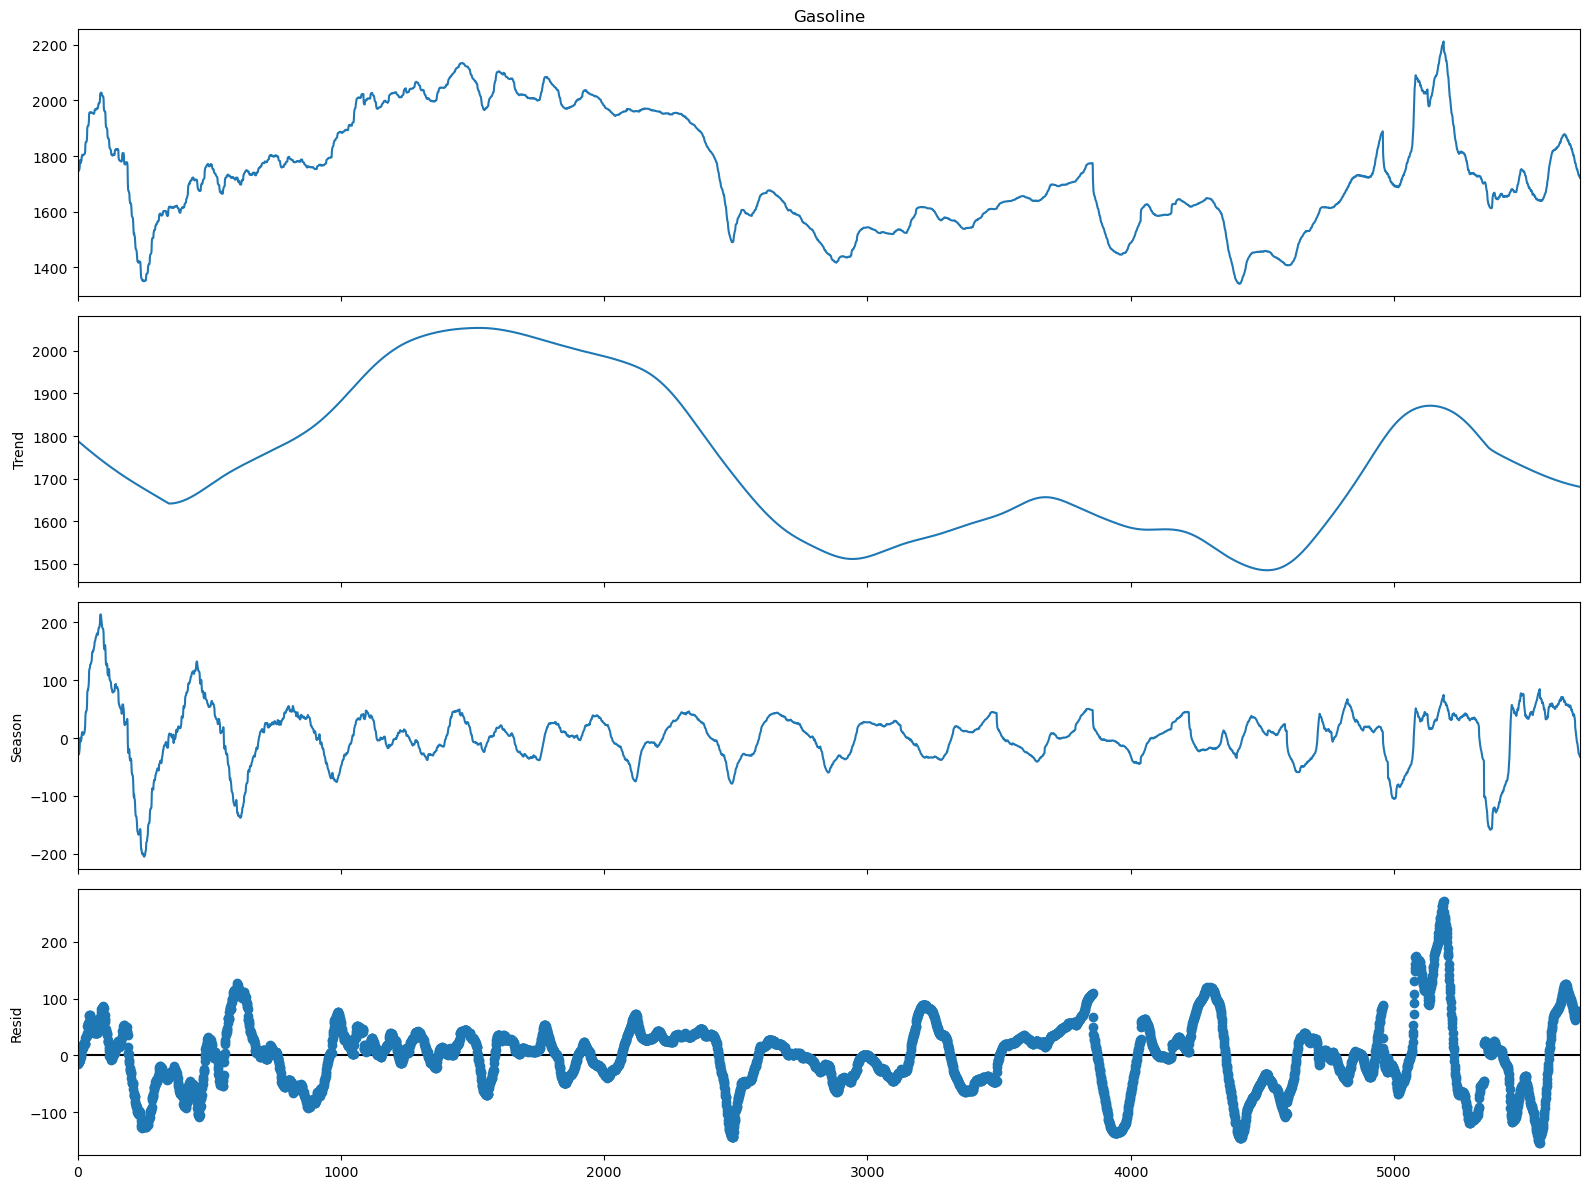

In [18]:
from statsmodels.tsa.seasonal import STL

stl = STL(gasoline['Gasoline'], period=365)
res = stl.fit()
fig = res.plot()

#### Detrend a Time Series - 데이터를 Stationary하게 만들기 위한 과정
시계열 데이터에서 트렌드를 제거하기 위해서 아래와 같이 다양한 방법이 있다.
1. 시계열 데이터에서 최적화 직선을 제거한다. 최적화 직선은 예측 변수로 시간 스텝을 사용하는 선형회귀에서 만들어진다. 더 복잡한 트렌드에 대해서, 모델에서 이차항(x^2)을 사용할 수 있다.
2. 앞에서 본 것과 같이 시계열 데이터 분해에서 얻어진 트렌드 구성요소를 제거한다.
3. 평균을 제거한다.
4. 이동 평균 트렌드 직선 또는 순환 구성요소를 제거하기 위해서 Baxter-King filter(statsmodels.tsa.filters.bkfilter) 또는 the Hodrick-Prescott Filter (statsmodels.tsa.filters.hpfilter)와 같은 필터를 적용한다.

- 최적화 직선을 제거해서 트렌드를 제거한다. 우상향 트렌드가 제거되면서 계절성을 보다 명확하게 확인할 수 있다.

Text(0.5, 1.0, 'Gasoline Price detrended by subtracting the least squares fit')

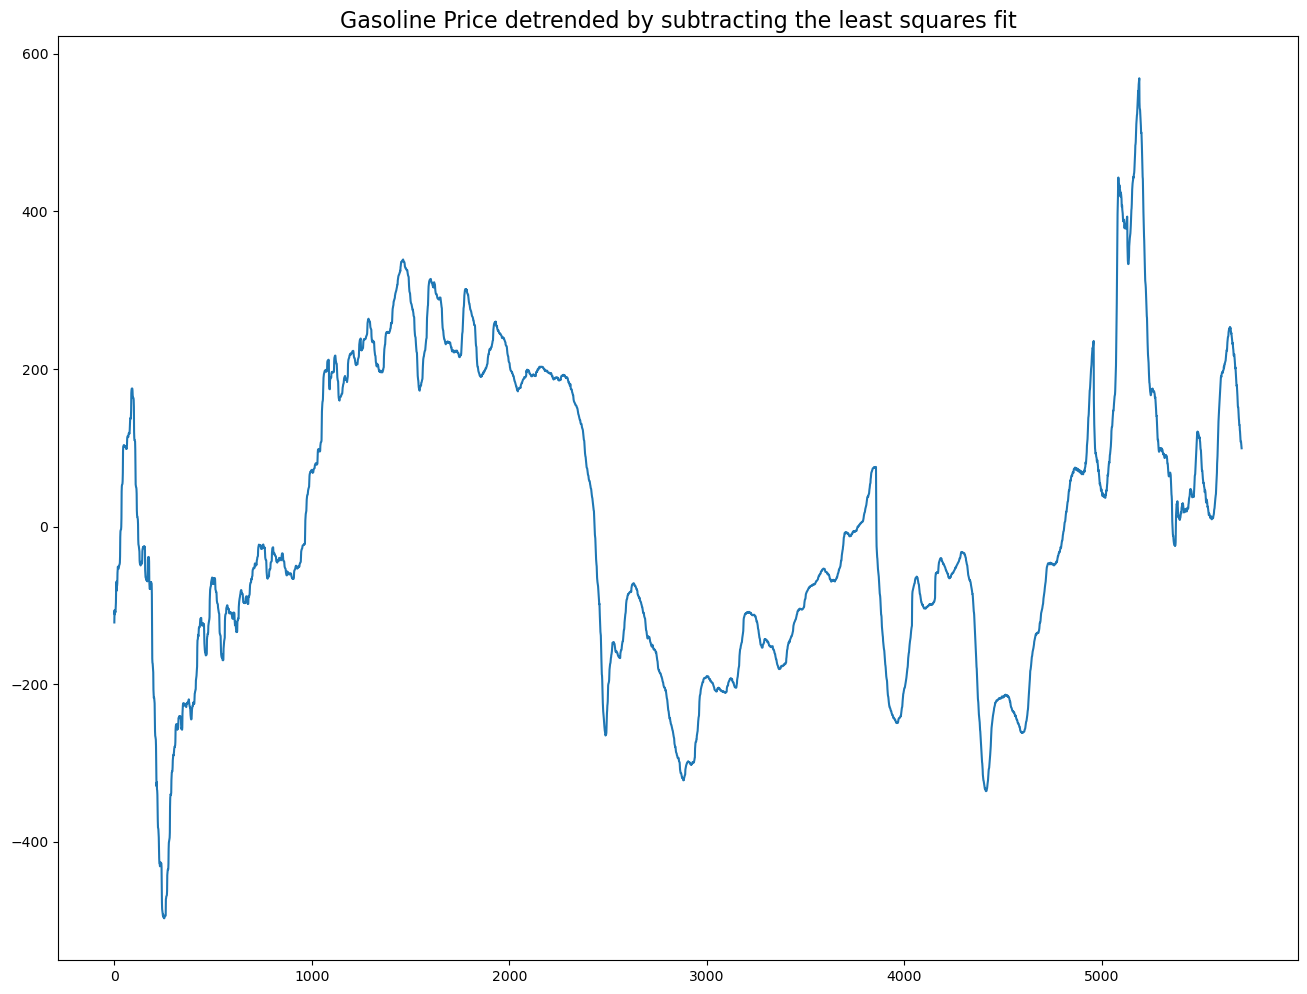

In [19]:
from scipy import signal
detrended = signal.detrend(gasoline['Gasoline'].values)
plt.plot(detrended)
plt.title('Gasoline Price detrended by subtracting the least squares fit',
          fontsize=16)

Text(0.5, 1.0, 'Gasoline Price detrended by subtracting the trend component')

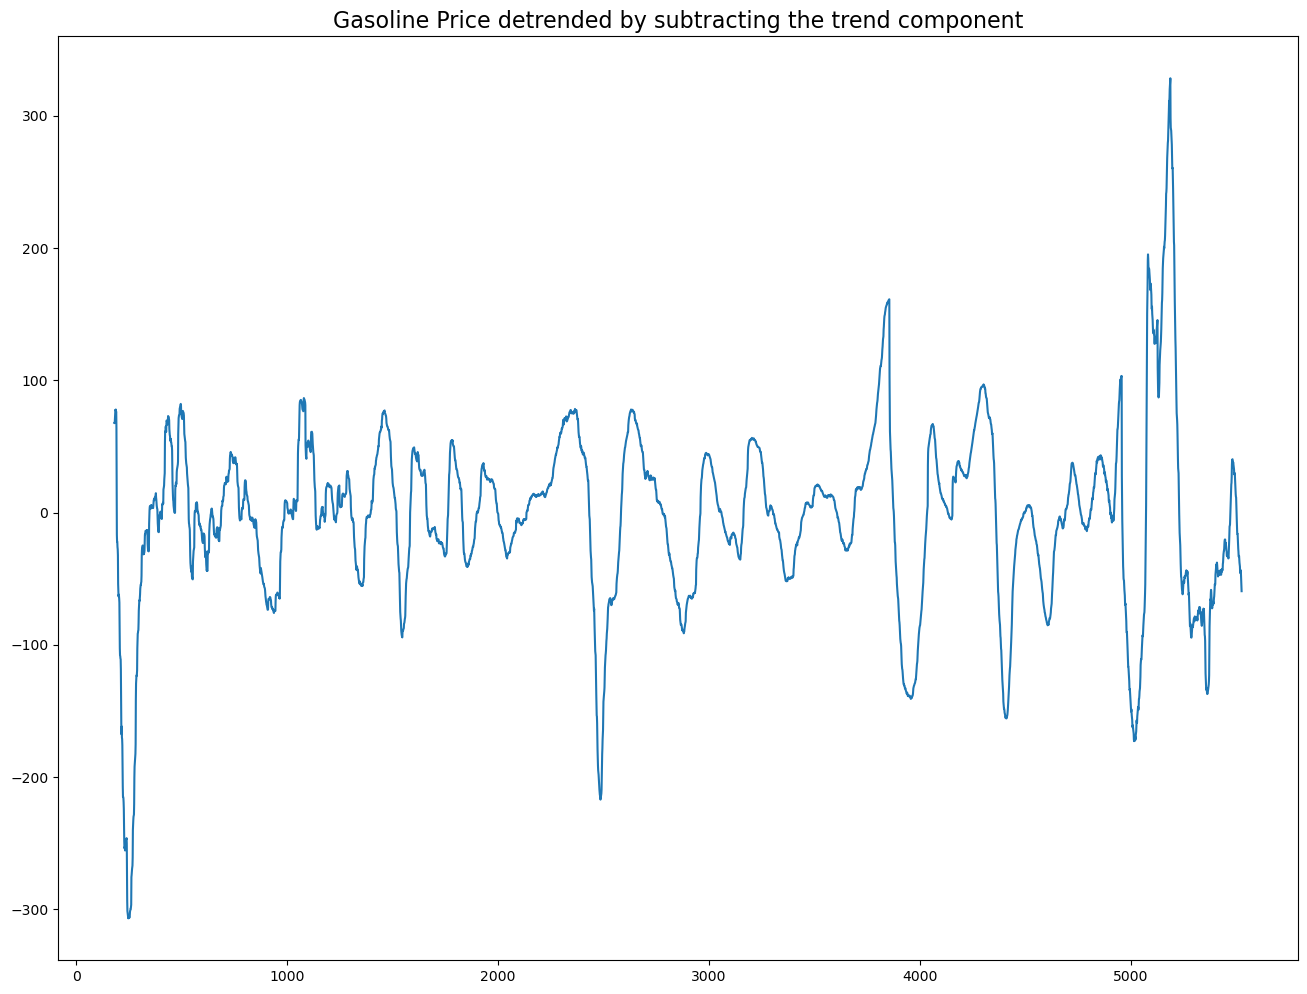

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose
result_mul = seasonal_decompose(gasoline['Gasoline'], model='multiplicative', period=360)
detrended = gasoline['Gasoline'].values - result_mul.trend
plt.plot(detrended)
plt.title('Gasoline Price detrended by subtracting the trend component', fontsize=16)

#### Deseasonalize a Time Series

[]

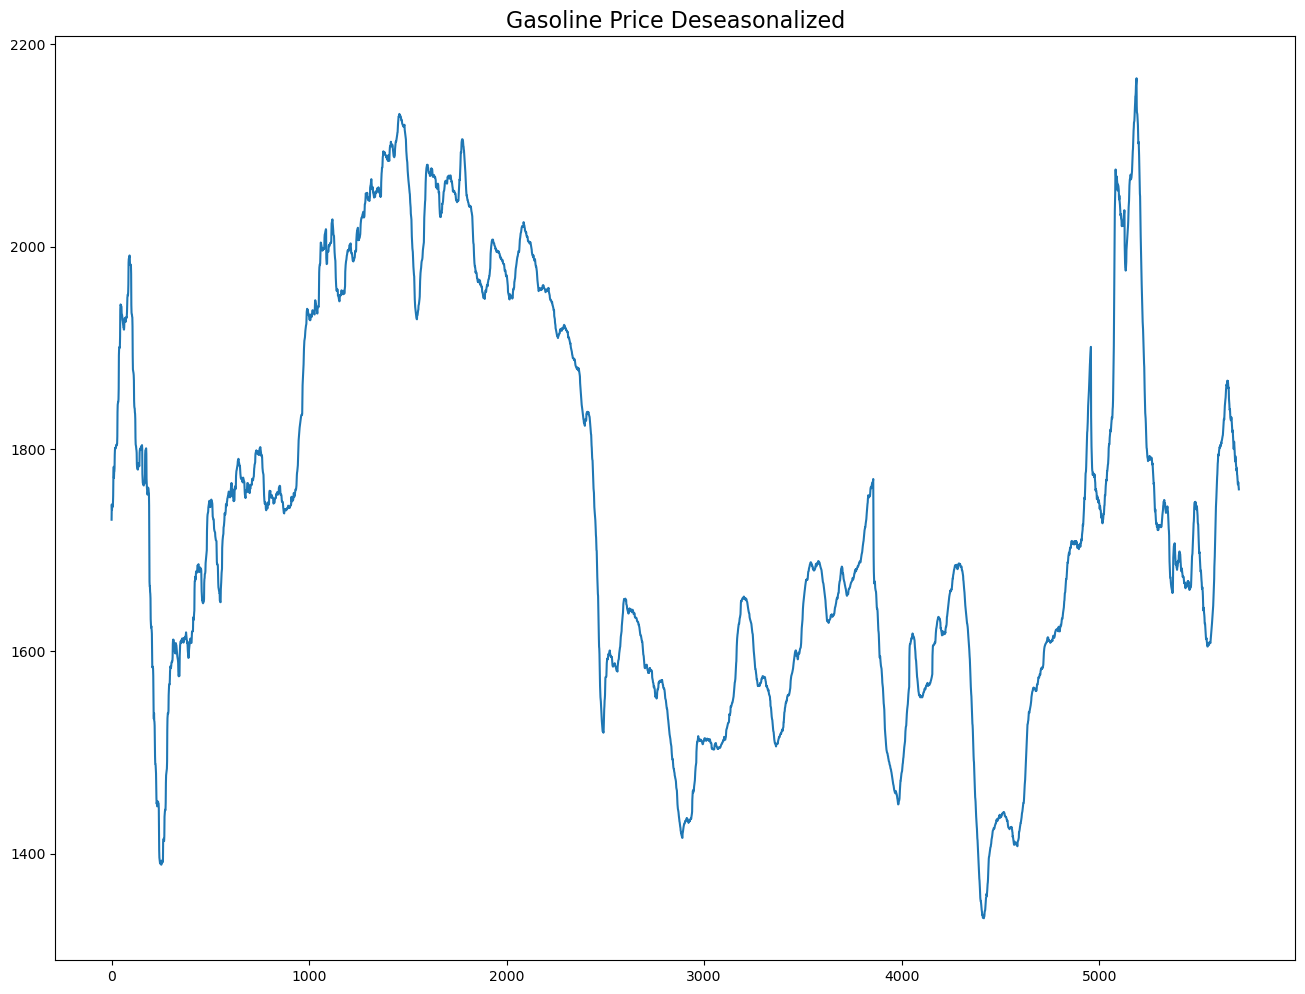

In [21]:
# Time Series Decomposition
result_mul = seasonal_decompose(gasoline['Gasoline'], model='multiplicative', period=365)

# Deseasonalize
deseasonalized = gasoline['Gasoline'].values / result_mul.seasonal

# Plot
plt.plot(deseasonalized)
plt.title('Gasoline Price Deseasonalized', fontsize=16)
plt.plot()

#### Test seasonality of a Time Series
1. Hour of day
2. Day of month
3. Weekly
4. Monthly
5. Yearly

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

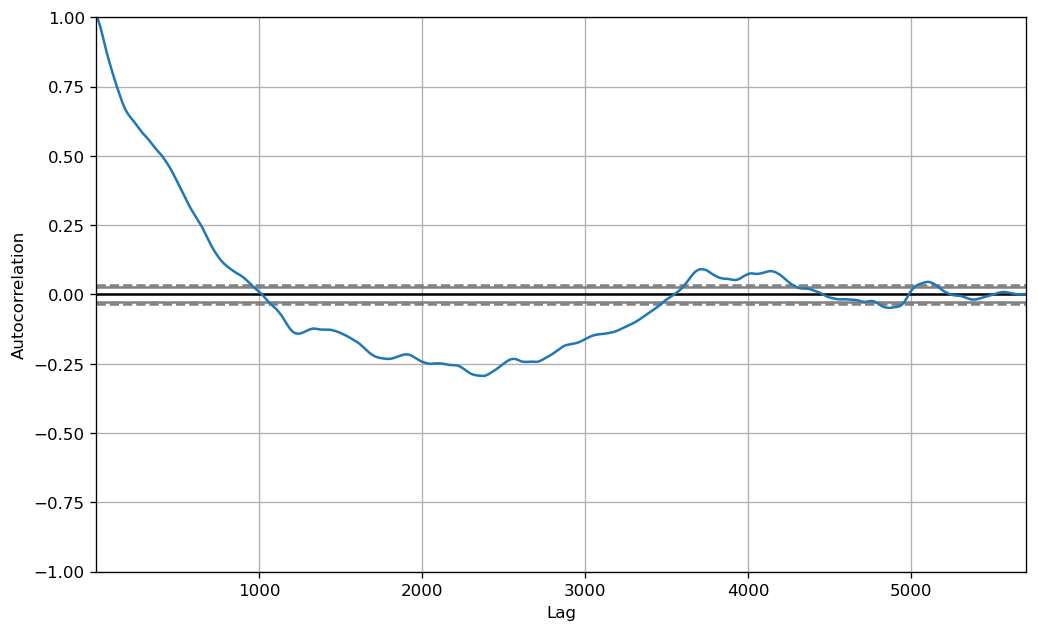

In [22]:
# Test for seasonality
from pandas.plotting import autocorrelation_plot

# Draw Plot
plt.rcParams.update({'figure.figsize':(10,6), 'figure.dpi':120})
autocorrelation_plot(gasoline['Gasoline'].tolist())

잡음 때문에 왜곡

[]

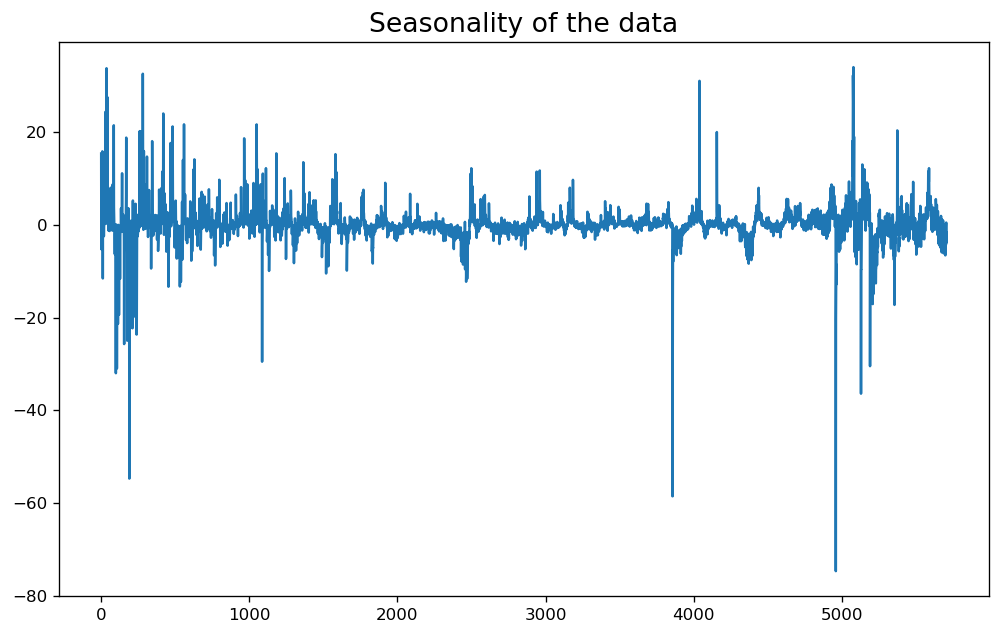

In [25]:
diff = gasoline.Gasoline.diff()
plt.plot(diff)
plt.title('Seasonality of the data', fontsize=16)
plt.plot()
#계절성 확인

#### Autocorrelation and Partial Autocorrelation Functions 

- **Autocorrelation** is simply the correlation of a series with its own lags. If a series is significantly autocorrelated, that means, the previous values of the series (lags) may be helpful in predicting the current value.
- **Partial Autocorrelation** also conveys similar information but it conveys the pure correlation of a series and its lag, excluding the correlation contributions from the intermediate lags.

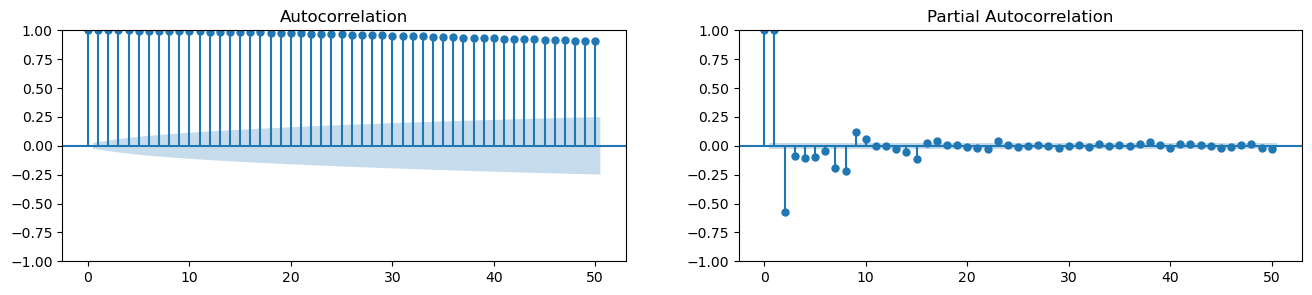

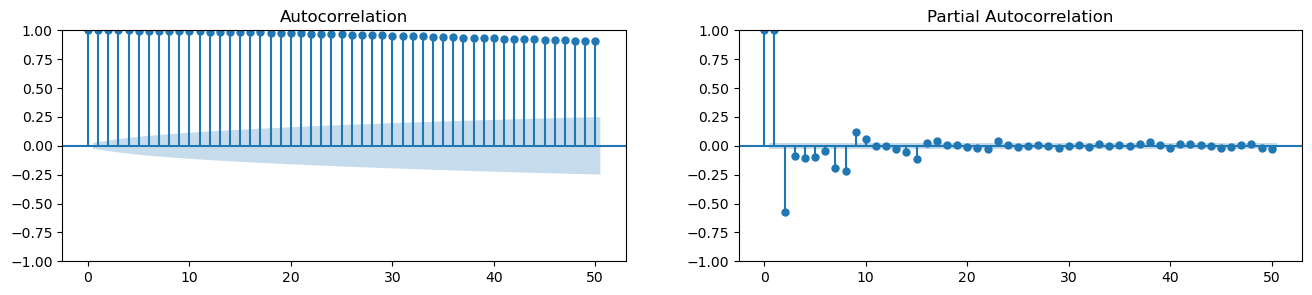

In [26]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(gasoline['Gasoline'].tolist(), lags=50, ax=axes[0])
plot_pacf(gasoline['Gasoline'].tolist(), lags=50, ax=axes[1])

Lags의 기준이 무엇인지 파악 필요성

### 향후 개선해야 할 사항
1. 통계적 결과와 그래프에 대한 쉬운 추가 설명 필요
2. Deseasonalize, test for seasonality, Autocorrelation & Partial Autocorrelation, Computation of Partial Autocorrelation Function, Lag plots, Granger Causality Test, Smoothening 과정을 통해 Time series 데이터를 모델 학습에 적합하도록 가공
3. SARIMAX, LSTM, Neural Prophet등 여러 모델을 학습하여 성능 비교 및 정량적 성능 지표 개발
---
*참고 자료*
* https://www.kaggle.com/code/prashant111/complete-guide-on-time-series-analysis-in-python<br>
* https://www.linkedin.com/pulse/time-series-analysis-sarimax-lstm-fb-prophet-python-commodity-ahmed